In [1]:
import torch
from src import *
from matplotlib import pyplot as plt

NOTE: Redirects are currently not supported in Windows or MacOs.


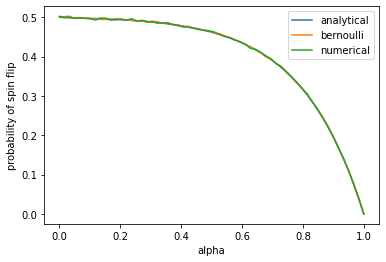

In [3]:
shape=[60,100000]

k=1

alphas=torch.linspace(0,1,shape[0])
pflip=probablity_flip_gaussian(alphas,k)

plt.plot(alphas,pflip,label='analytical')

bern=bernoulli_noise(torch.zeros(shape).to(torch.bool),alphas).to(torch.float)
bern=torch.mean(bern,dim=1)

plt.plot(alphas,bern,label='bernoulli')

thetas=-torch.ones(shape)*.5



thetas=gaussian_noise(thetas,alphas,k)
thetas=qubit_collapse(thetas)
thetas=qubit_to_binary(thetas).float()

thetas=torch.mean(thetas,(1))

plt.plot(alphas,thetas,label='numerical')
plt.ylabel('probability of spin flip')
plt.xlabel('alpha')
plt.legend()
plt.show()

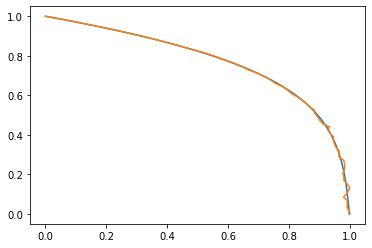

In [4]:
plt.plot(-torch.log2(1-pflip),alphas)
plt.plot(-torch.log2(1-thetas),alphas)

In [20]:
def test_back_to_back():
    x=torch.rand([10, 3, 12, 14])
    y=x.clone()

    y=decimal_to_qubits(y,bits=8)
    y=qubit_to_decimal(y, bits=8)

    #print(x-y)
    return (torch.abs(y-x)<=1/255).all()

In [7]:
test_back_to_back()

tensor(True)

In [9]:
img=torch.rand([10,24,10,10])
bernulli_prob = torch.einsum("b, bchw -> bchw", torch.rand([10])*0.5, torch.ones_like(img))


In [14]:
bernulli_prob.shape

torch.Size([10, 24, 10, 10])

In [2]:
def times2(x:int):
    return x*2

times2(2),times2(.3)

(4, 0.6)

In [3]:
times2.__name__

'times2'